In [41]:
import pandas as pd 
import numpy as np

import scipy.stats as stats
from scipy.special import erf

import matplotlib.pyplot as plt
import math

In [2]:
N = 19
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
col

'Time_on_Gaming'

# –ê–Ω–∞–ª–∏–∑ –∫–æ–ª–æ–Ω–∫–∏ Time_on_Gaming

## –û–±—â–∏–π –æ–±–∑–æ—Ä

–í –¥–∞–Ω–Ω–æ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ –±—ã–ª –ø—Ä–æ–≤–µ–¥–µ–Ω –≤—Å–µ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∞–Ω–∞–ª–∏–∑ –∫–æ–ª–æ–Ω–∫–∏ `Time_on_Gaming`, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –≤—Ä–µ–º—è, –ø—Ä–æ–≤–æ–¥–∏–º–æ–µ –ø–æ–¥—Ä–æ—Å—Ç–∫–∞–º–∏ –∑–∞ –∏–≥—Ä–∞–º–∏ (–≤ —á–∞—Å–∞—Ö). –í—ã–±–æ—Ä–∫–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç **3000 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π** —É—á–∞—â–∏—Ö—Å—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ —Å—Ä–µ–¥–Ω–µ–π —à–∫–æ–ª—ã.

### –ö–ª—é—á–µ–≤—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö:
- **–ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ**: 0 —á–∞—Å–æ–≤
- **–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ**: ~4 —á–∞—Å–∞
- **–¢–∏–ø –¥–∞–Ω–Ω—ã—Ö**: –ù–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
- **–ï–¥–∏–Ω–∏—Ü–∞ –∏–∑–º–µ—Ä–µ–Ω–∏—è**: –ß–∞—Å—ã –≤ –¥–µ–Ω—å

In [3]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
df.head()

ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0  ...                     1.4                    86               19   
1  ...                     0.9                    96                9   
2  ...                     0.5                   137                8   
3  ...                     1.4                   128                7   
4  ...                     1.0                    96               20   

   Time_on_Social_Media  Time_on_Gaming  Time_on_Education  \
0                   3.6             1.7                1.2   
1                   1.1             4.0                1.8   
2                   0.3             1.5                0.4   
3                   3.1             1.6                0.8   
4                   2.6             0.9                1.1   

   Phone_Usage_Purpose  Family_Communication  Weekend_Usage_Hours  \
0             Browsing                     4                  8.7   
1             Browsing                     2                  5.3   
2            Education                     6                  5.7   
3         Social Media                     8                  3.0   
4               Gaming                    10                  3.7   

   Addiction_Level  
0             10.0  
1             10.0  
2              9.2  
3              9.8  
4              8.6  

[5 rows x 25 columns]

# Stats

In [44]:
def get_stats(data):

    mean = np.mean(data)
    var = np.var(data)

    mode_values = data.mode()
    mode = mode_values.iloc[0]
    
    median = np.median(data)
    q25 = data.quantile(0.25)
    q50 = data.quantile(0.50)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    excess = data.kurtosis()
    skew = data.skew()

    print(f"""–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:
          
        –°—Ä–µ–¥–Ω–µ–µ: {mean:.2f}
        –î–∏—Å–ø–µ—Ä—Å–∏—è: {var:.2f}
        –ú–æ–¥–∞: {mode:.2f}
        –ú–µ–¥–∏–∞–Ω–∞: {median:.2f}
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: {q25:.2f}
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: {q50:.2f}
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: {q75:.2f}
        –≠–∫—Å—Ü–µ—Å—Å: {excess:.2f}
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: {skew:.2f}
        IQR: {iqr:.2f}

    """)

    num_bins = int(np.log2(data.size) + 1)
        
    figure, (hist_axis, ecdf_axis) = plt.subplots(1, 2, figsize=(16, 6))

    hist_axis.hist(data, bins=num_bins, alpha=0.8, color='lightsteelblue', 
                edgecolor='navy', density=True)
    hist_axis.set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞: {data.name}')
    hist_axis.set_xlabel('–í–µ–ª–∏—á–∏–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞')
    hist_axis.set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    hist_axis.grid(True, alpha=0.4, linestyle=':')

    hist_axis.axvline(data.mean(), color='crimson', linestyle='-', 
                    label=f'–°—Ä–µ–¥–Ω–µ–µ: {data.mean():.2f}', linewidth=2)
    hist_axis.axvline(data.median(), color='forestgreen', linestyle='-', 
                    label=f'–ú–µ–¥–∏–∞–Ω–∞: {data.median():.2f}', linewidth=2)
    hist_axis.legend(framealpha=0.9)

    sorted_values = np.sort(data.dropna())
    cumulative_prob = np.linspace(0, 1, len(sorted_values))

    ecdf_axis.plot(sorted_values, cumulative_prob, color='darkblue', 
                linewidth=2.5, drawstyle='steps-post')
    ecdf_axis.set_title(f'–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞: {data.name}')
    ecdf_axis.set_xlabel('–í–µ–ª–∏—á–∏–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞')
    ecdf_axis.set_ylabel('–ù–∞–∫–æ–ø–ª–µ–Ω–Ω–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å')
    ecdf_axis.grid(True, alpha=0.4, linestyle=':')
    ecdf_axis.set_ylim(-0.02, 1.02)

    ecdf_axis.axvline(q25, color='darkorange', linestyle='--', 
                    label=f'25-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {q25:.2f}', alpha=0.8)
    ecdf_axis.axvline(q50, color='limegreen', linestyle='--', 
                    label=f'–ú–µ–¥–∏–∞–Ω–∞: {q50:.2f}', alpha=0.8)
    ecdf_axis.axvline(q75, color='firebrick', linestyle='--', 
                    label=f'75-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: {q75:.2f}', alpha=0.8)
    ecdf_axis.legend(framealpha=0.9)

    plt.tight_layout(pad=2.0)

ModeResult(mode=np.float64(0.0), count=np.int64(205))
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

        –°—Ä–µ–¥–Ω–µ–µ: 1.53
        –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.87
        –ú–æ–¥–∞: 0.00
        –ú–µ–¥–∏–∞–Ω–∞: 1.50
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: 0.80
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: 1.50
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: 2.20
        –≠–∫—Å—Ü–µ—Å—Å: -0.50
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: 0.26
        IQR: 1.40

    


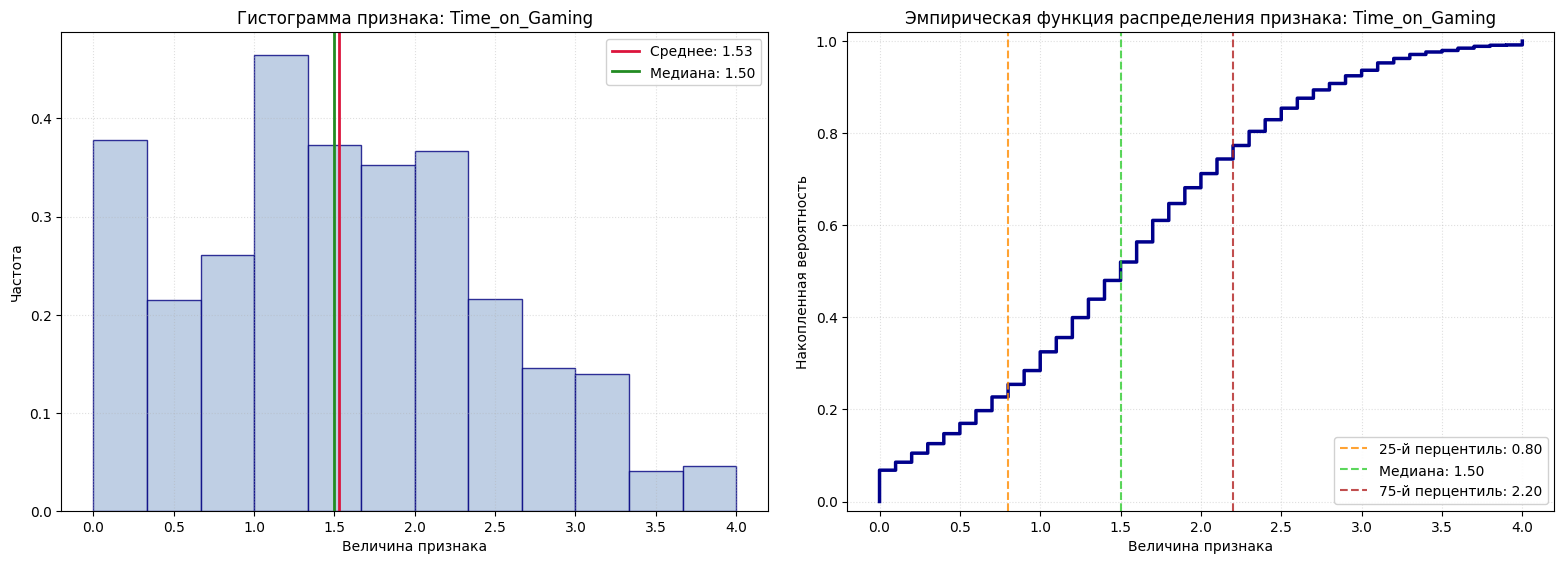

In [43]:
get_stats(df[col])

## –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏

### –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏
- **–°—Ä–µ–¥–Ω–µ–µ –∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–æ–µ**: 1,53 —á–∞—Å–∞
- **–ú–µ–¥–∏–∞–Ω–∞**: 1,50 —á–∞—Å–∞  
- **–ú–æ–¥–∞**: 0,00 —á–∞—Å–æ–≤

### –ò–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö
- **–î–∏—Å–ø–µ—Ä—Å–∏—è**: 0,87
- **–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ**: ~0,93 —á–∞—Å–∞
- **–ò–Ω—Ç–µ—Ä–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR)**: 1,40 —á–∞—Å–∞
- **25-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å**: 0,80 —á–∞—Å–∞
- **75-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—å**: 2,20 —á–∞—Å–∞

### –ö–ª—é—á–µ–≤—ã–µ –≤—ã–≤–æ–¥—ã –ø–æ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞–º:

1. **–ë–ª–∏–∑–æ—Å—Ç—å —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π**: –°—Ä–µ–¥–Ω–µ–µ (1,53) –∏ –º–µ–¥–∏–∞–Ω–∞ (1,50) –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π —á–∞—Å—Ç–∏.

2. **–ù—É–ª–µ–≤–∞—è –º–æ–¥–∞**: –ú–æ–¥–∞ —Ä–∞–≤–Ω–∞ 0, —á—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–µ–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ - —ç—Ç–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –∏–≥—Ä—ã. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è —á–∞—Å—Ç—å –ø–æ–¥—Ä–æ—Å—Ç–∫–æ–≤ –Ω–µ –∏–≥—Ä–∞–µ—Ç –≤ –∏–≥—Ä—ã –≤–æ–æ–±—â–µ.

3. **–£–º–µ—Ä–µ–Ω–Ω–∞—è –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç—å**: –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 0,93 —á–∞—Å–∞, —á—Ç–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —É–º–µ—Ä–µ–Ω–Ω—ã–π —Ä–∞–∑–±—Ä–æ—Å –¥–∞–Ω–Ω—ã—Ö –≤–æ–∫—Ä—É–≥ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è.

4. **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏–ª–µ–π**: 
   - 25% —É—á–∞—â–∏—Ö—Å—è –∏–≥—Ä–∞—é—Ç –º–µ–Ω–µ–µ 0,8 —á–∞—Å–∞ –≤ –¥–µ–Ω—å
   - 50% —É—á–∞—â–∏—Ö—Å—è –∏–≥—Ä–∞—é—Ç –º–µ–Ω–µ–µ 1,5 —á–∞—Å–∞ –≤ –¥–µ–Ω—å
   - 75% —É—á–∞—â–∏—Ö—Å—è –∏–≥—Ä–∞—é—Ç –º–µ–Ω–µ–µ 2,2 —á–∞—Å–∞ –≤ –¥–µ–Ω—å


# Criteria

In [6]:
def normal_cumulative_dist(mu, sigma, x):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç –∏–Ω—Ç–µ–≥—Ä–∞–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è N(Œº, œÉ¬≤)
    """
    z_score = (x - mu) / sigma
    return 0.5 * (1 + math.erf(z_score / math.sqrt(2)))


def compute_frequency_bins(values, num_bins=None):
    """
    –§–æ—Ä–º–∏—Ä—É–µ—Ç –±–∏–Ω—ã –∏ –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ—Ç —á–∞—Å—Ç–æ—Ç—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
    –ï—Å–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∏–Ω–æ–≤ –Ω–µ —É–∫–∞–∑–∞–Ω–æ, –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è —Ñ–æ—Ä–º—É–ª–∞ –°—Ç–∞—Ä–¥–∂–µ—Å—Å–∞
    """
    if num_bins is None:
        num_bins = int(1 + 3.322 * math.log10(len(values)))
    
    min_value = np.min(values)
    max_value = np.max(values)
    
    bin_boundaries = np.linspace(min_value, max_value, num_bins + 1)
    frequencies, _ = np.histogram(values, bins=bin_boundaries)
    
    return frequencies, bin_boundaries


def calculate_expected_normal_frequencies(values, mu, sigma):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ —á–∞—Å—Ç–æ—Ç—ã –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    """
    sample_size = len(values)
    empirical_freq, bin_limits = compute_frequency_bins(values)
    theoretical_freq = []
    
    for i in range(len(bin_limits) - 1):
        lower_bound = bin_limits[i]
        upper_bound = bin_limits[i + 1]
        
        # –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–æ–ø–∞–¥–∞–Ω–∏—è –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª [lower_bound, upper_bound)
        prob_lower = normal_cumulative_dist(mu, sigma, lower_bound)
        prob_upper = normal_cumulative_dist(mu, sigma, upper_bound)
        interval_probability = prob_upper - prob_lower
        
        theoretical_freq.append(round(sample_size * interval_probability))
    
    return np.array(theoretical_freq), empirical_freq


def compute_chi_square_metric(empirical, theoretical):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ œá¬≤ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
    """
    chi_square_value = 0
    
    for i in range(len(empirical)):
        if theoretical[i] > 0:
            deviation = empirical[i] - theoretical[i]
            chi_square_value += (deviation ** 2) / theoretical[i]
    
    return chi_square_value


def assess_normality_chi_square(values, significance=0.05):
    """
    –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –∑–∞–∫–æ–Ω—É —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è œá¬≤
    """
    print("üîç" * 25)
    print("–ê–ù–ê–õ–ò–ó –ù–û–†–ú–ê–õ–¨–ù–û–°–¢–ò –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø")
    print("üìä –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è œá¬≤ (—Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç)")
    print("üîç" * 25)
    
    n = len(values)
    mu_est = np.mean(values)
    sigma_est = np.std(values, ddof=1)
    
    print(f"üìà –û–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏: {n} –Ω–∞–±–ª—é–¥–µ–Ω–∏–π")
    print(f"üìê –û—Ü–µ–Ω–∫–∞ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è: Œº = {mu_est:.6f}")
    print(f"üìè –û—Ü–µ–Ω–∫–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è: œÉ = {sigma_est:.6f}")
    
    exp_freq, obs_freq = calculate_expected_normal_frequencies(values, mu_est, sigma_est)
    
    # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —É—Å–ª–æ–≤–∏–π –∫—Ä–∏—Ç–µ—Ä–∏—è
    min_expected = 5
    merged_observed = []
    merged_expected = []
    
    temp_obs = 0
    temp_exp = 0
    
    for i in range(len(obs_freq)):
        temp_obs += obs_freq[i]
        temp_exp += exp_freq[i]
        
        if temp_exp >= min_expected or i == len(obs_freq) - 1:
            merged_observed.append(temp_obs)
            merged_expected.append(temp_exp)
            temp_obs = 0
            temp_exp = 0
    
    final_obs = np.array(merged_observed)
    final_exp = np.array(merged_expected)
    
    print(f"\nüìä –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: {len(final_obs)}")
    print(f"üëÄ –ù–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã:    {final_obs}")
    print(f"üìò –û–∂–∏–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã:      {final_exp.round(1)}")
    
    chi_sq_value = compute_chi_square_metric(final_obs, final_exp)
    
    # –°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: (–∏–Ω—Ç–µ—Ä–≤–∞–ª—ã - 1) - –æ—Ü–µ–Ω–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
    degrees_freedom = len(final_obs) - 3
    
    print(f"\nüìä –í—ã—á–∏—Å–ª–µ–Ω–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ œá¬≤: {chi_sq_value:.6f}")
    print(f"üéØ –°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: {degrees_freedom}")
    
    if degrees_freedom <= 0:
        print("‚ö†Ô∏è  –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞")
        return None
    
    critical_val = stats.chi2.ppf(1 - significance, degrees_freedom)
    p_val = 1 - stats.chi2.cdf(chi_sq_value, degrees_freedom)
    
    print(f"üî¥ –ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (Œ±={significance}): {critical_val:.6f}")
    print(f"üìâ P-–∑–Ω–∞—á–µ–Ω–∏–µ: {p_val:.6f}")
    
    normal_distribution = chi_sq_value <= critical_val
    
    print(f"\nüéØ –ó–ê–ö–õ–Æ–ß–ï–ù–ò–ï: ", end="")
    if normal_distribution:
        print("‚úÖ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –∑–∞–∫–æ–Ω—É")
        print(f"   (œá¬≤ = {chi_sq_value:.3f} ‚â§ {critical_val:.3f}, p = {p_val:.4f})")
    else:
        print("‚ùå –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ù–ï —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –∑–∞–∫–æ–Ω—É")
        print(f"   (œá¬≤ = {chi_sq_value:.3f} > {critical_val:.3f}, p = {p_val:.4f})")
    
    return {
        'chi_square_statistic': chi_sq_value,
        'degrees_of_freedom': degrees_freedom,
        'p_value': p_val,
        'critical_threshold': critical_val,
        'is_normal_distribution': normal_distribution,
        'estimated_mu': mu_est,
        'estimated_sigma': sigma_est
    }

In [7]:
chi2 = assess_normality_chi_square(df[col])

üîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîç
–ê–ù–ê–õ–ò–ó –ù–û–†–ú–ê–õ–¨–ù–û–°–¢–ò –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø
üìä –ö—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≥–ª–∞—Å–∏—è œá¬≤ (—Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç)
üîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîçüîç
üìà –û–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏: 3000 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
üìê –û—Ü–µ–Ω–∫–∞ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –æ–∂–∏–¥–∞–Ω–∏—è: Œº = 1.525267
üìè –û—Ü–µ–Ω–∫–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è: œÉ = 0.932701

üìä –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –ø–æ—Å–ª–µ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è: 12
üëÄ –ù–∞–±–ª—é–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã:    [378 215 261 465 373 353 367 216 146 139  41  46]
üìò –û–∂–∏–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã:      [149 234 324 395 425 403 337 248 161  92  46  21]

üìä –í—ã—á–∏—Å–ª–µ–Ω–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ œá¬≤: 453.230069
üéØ –°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: 9
üî¥ –ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (Œ±=0.05): 16.918978


In [8]:
def analyze_distribution_shape(sample_data, significance_level=0.05):
    """
    –ê–Ω–∞–ª–∏–∑ —Ñ–æ—Ä–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–µ—Ä–µ–∑ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ —ç–∫—Å—Ü–µ—Å—Å–∞
    —Å –ø—Ä–æ–≤–µ—Ä–∫–æ–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é
    """
    
    processed_data = sample_data.dropna()
    sample_size = len(processed_data)
    
    asymmetry_coef = processed_data.skew()
    excess_coef = processed_data.kurtosis()  # —ç–∫—Å—Ü–µ—Å—Å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    
    print("üåü" * 35)
    print("–ê–ù–ê–õ–ò–ó –§–û–†–ú–´ –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø –î–ê–ù–ù–´–•")
    print("üìä –û—Ü–µ–Ω–∫–∞ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ —ç–∫—Å—Ü–µ—Å—Å–∞")
    print("üåü" * 35)
    
    print(f"üìã –û–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {sample_size} –Ω–∞–±–ª—é–¥–µ–Ω–∏–π")
    print(f"üìê –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: {asymmetry_coef:+.6f}")
    print(f"üìè –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —ç–∫—Å—Ü–µ—Å—Å–∞: {excess_coef:+.6f}")
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—à–∏–±–æ–∫
    std_error_asymmetry = math.sqrt(6 * sample_size * (sample_size - 1) / 
                                  ((sample_size - 2) * (sample_size + 1) * (sample_size + 3)))
    
    std_error_excess = math.sqrt(24 * sample_size * (sample_size - 1) * (sample_size - 1) /
                               ((sample_size - 3) * (sample_size - 2) * (sample_size + 3) * (sample_size + 5)))
    
    print(f"\nüìä –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: {std_error_asymmetry:.6f}")
    print(f"üìä –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ —ç–∫—Å—Ü–µ—Å—Å–∞: {std_error_excess:.6f}")
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫
    z_score_asymmetry = asymmetry_coef / std_error_asymmetry
    z_score_excess = excess_coef / std_error_excess
    
    print(f"üìà Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: {z_score_asymmetry:+.6f}")
    print(f"üìà Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —ç–∫—Å—Ü–µ—Å—Å–∞: {z_score_excess:+.6f}")
    
    # –ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Z –¥–ª—è –¥–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–µ–≥–æ —Ç–µ—Å—Ç–∞
    z_critical_value = stats.norm.ppf(1 - significance_level/2)
    print(f"üéØ –ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Z (Œ±={significance_level}): ¬±{z_critical_value:.6f}")
    
    # –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –≥–∏–ø–æ—Ç–µ–∑
    asymmetry_normal = abs(z_score_asymmetry) <= z_critical_value
    excess_normal = abs(z_score_excess) <= z_critical_value
    distribution_normal = asymmetry_normal and excess_normal
    
    print(f"\nüîç –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ü–†–û–í–ï–†–ö–ò:")
    print(f"   –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: {'‚úÖ –í –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã' if asymmetry_normal else '‚ùå –í—ã—Ö–æ–¥–∏—Ç –∑–∞ –ø—Ä–µ–¥–µ–ª—ã'}")
    print(f"   –≠–∫—Å—Ü–µ—Å—Å: {'‚úÖ –í –ø—Ä–µ–¥–µ–ª–∞—Ö –Ω–æ—Ä–º—ã' if excess_normal else '‚ùå –í—ã—Ö–æ–¥–∏—Ç –∑–∞ –ø—Ä–µ–¥–µ–ª—ã'}")
    print(f"   üìù –û–±—â–∏–π –≤—ã–≤–æ–¥: {'‚úÖ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É' if distribution_normal else '‚ùå –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ'}")
    
    # –†–∞—Å—á–µ—Ç p-–∑–Ω–∞—á–µ–Ω–∏–π
    p_value_asymmetry = 2 * (1 - stats.norm.cdf(abs(z_score_asymmetry)))
    p_value_excess = 2 * (1 - stats.norm.cdf(abs(z_score_excess)))
    
    print(f"\nüìâ P-–ó–ù–ê–ß–ï–ù–ò–Ø:")
    print(f"   –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: {p_value_asymmetry:.6f} {'(> 0.05)' if p_value_asymmetry > 0.05 else '(‚â§ 0.05)'}")
    print(f"   –≠–∫—Å—Ü–µ—Å—Å: {p_value_excess:.6f} {'(> 0.05)' if p_value_excess > 0.05 else '(‚â§ 0.05)'}")
    
    # –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π
    print(f"\nüìö –ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –ü–û–ö–ê–ó–ê–¢–ï–õ–ï–ô:")
    if abs(asymmetry_coef) < 0.5:
        print(f"   ‚Ä¢ –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è ({asymmetry_coef:+.3f})")
    elif abs(asymmetry_coef) < 1.0:
        print(f"   ‚Ä¢ –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: —É–º–µ—Ä–µ–Ω–Ω–∞—è ({asymmetry_coef:+.3f})")
    else:
        print(f"   ‚Ä¢ –ê—Å–∏–º–º–µ—Ç—Ä–∏—è: —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–∞—è ({asymmetry_coef:+.3f})")
    
    if abs(excess_coef) < 0.5:
        print(f"   ‚Ä¢ –≠–∫—Å—Ü–µ—Å—Å: –±–ª–∏–∑–æ–∫ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É ({excess_coef:+.3f})")
    elif abs(excess_coef) < 1.0:
        print(f"   ‚Ä¢ –≠–∫—Å—Ü–µ—Å—Å: —É–º–µ—Ä–µ–Ω–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ ({excess_coef:+.3f})")
    else:
        print(f"   ‚Ä¢ –≠–∫—Å—Ü–µ—Å—Å: –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ ({excess_coef:+.3f})")
    
    return {
        'sample_size': sample_size,
        'skewness_coefficient': asymmetry_coef,
        'kurtosis_coefficient': excess_coef,
        'skewness_std_error': std_error_asymmetry,
        'kurtosis_std_error': std_error_excess,
        'skewness_z_score': z_score_asymmetry,
        'kurtosis_z_score': z_score_excess,
        'skewness_p_value': p_value_asymmetry,
        'kurtosis_p_value': p_value_excess,
        'critical_z_value': z_critical_value,
        'is_skewness_normal': asymmetry_normal,
        'is_kurtosis_normal': excess_normal,
        'is_normal_distribution': distribution_normal,
        'distribution_type': 'normal' if distribution_normal else 'non-normal'
    }

In [9]:
result_sk = analyze_distribution_shape(df[col])

üåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåü
–ê–ù–ê–õ–ò–ó –§–û–†–ú–´ –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø –î–ê–ù–ù–´–•
üìä –û—Ü–µ–Ω–∫–∞ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ —ç–∫—Å—Ü–µ—Å—Å–∞
üåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåüüåü
üìã –û–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: 3000 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
üìê –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: +0.259011
üìè –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —ç–∫—Å—Ü–µ—Å—Å–∞: -0.498206

üìä –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: 0.044699
üìä –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ —ç–∫—Å—Ü–µ—Å—Å–∞: 0.089368
üìà Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏: +5.794552
üìà Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —ç–∫—Å—Ü–µ—Å—Å–∞: -5.574753
üéØ –ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Z (Œ±=0.05): ¬±1.959964

üîç –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ü–†–û–í–ï–†–ö–ò:
   –ê—Å–∏–º–º–µ—Ç—Ä–∏—è:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def visualize_quantile_comparison(sample_data):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–≤–∞–Ω—Ç–∏–ª—å-–∫–≤–∞–Ω—Ç–∏–ª—å –≥—Ä–∞—Ñ–∏–∫–∞ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    
    Parameters:
    sample_data: Series - –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö
    """
    
    processed_sample = sample_data.dropna().sort_values()
    sample_size = len(processed_sample)
    
    print("üìä" * 25)
    print("–î–ò–ê–ì–ù–û–°–¢–ò–ö–ê –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø: Q-Q –ê–ù–ê–õ–ò–ó")
    print("üìà –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∏—Ö –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏—Ö –∫–≤–∞–Ω—Ç–∏–ª–µ–π")
    print("üìä" * 25)
    
    print(f"üî¢ –û–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏: {sample_size} –Ω–∞–±–ª—é–¥–µ–Ω–∏–π")
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –ø–æ–∑–∏—Ü–∏–π –¥–ª—è –∫–≤–∞–Ω—Ç–∏–ª–µ–π
    quantile_positions = (np.arange(1, sample_size + 1) - 0.375) / (sample_size + 0.25)
    normal_quantiles = stats.norm.ppf(quantile_positions)
    
    # –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
    data_mean = processed_sample.mean()
    data_std = processed_sample.std(ddof=1)
    standardized_sample = (processed_sample - data_mean) / data_std
    
    # –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # –û—Å–Ω–æ–≤–Ω–æ–π Q-Q plot
    scatter = ax.scatter(normal_quantiles, standardized_sample, 
                        alpha=0.7, color='steelblue', s=35, 
                        edgecolor='white', linewidth=0.5)
    
    # –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è
    data_range = [min(normal_quantiles.min(), standardized_sample.min()),
                 max(normal_quantiles.max(), standardized_sample.max())]
    ax.plot(data_range, data_range, 'r-', linewidth=2.5, 
            label='–õ–∏–Ω–∏—è –ø–æ–ª–Ω–æ–≥–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è', alpha=0.8)
    
    # –î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã
    confidence_se = 1.48 / np.sqrt(sample_size)
    upper_ci = normal_quantiles + 1.96 * confidence_se
    lower_ci = normal_quantiles - 1.96 * confidence_se
    
    ax.fill_between(normal_quantiles, lower_ci, upper_ci, 
                    color='lightgreen', alpha=0.3, 
                    label='95% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±–ª–∞—Å—Ç—å')
    
    ax.set_xlabel('–¢–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –∫–≤–∞–Ω—Ç–∏–ª–∏ N(0,1)', fontsize=12, fontweight='bold')
    ax.set_ylabel('–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –≤—ã–±–æ—Ä–æ—á–Ω—ã–µ –∫–≤–∞–Ω—Ç–∏–ª–∏', fontsize=12, fontweight='bold')
    ax.set_title(f'Q-Q –î–∏–∞–≥—Ä–∞–º–º–∞: {sample_data.name}\n–û—Ü–µ–Ω–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # –†–∞–∑–º–µ—â–∞–µ–º –ª–µ–≥–µ–Ω–¥—ã –≤ —Ä–∞–∑–Ω—ã—Ö —É–≥–ª–∞—Ö
    ax.legend(loc='upper left', framealpha=0.9)
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑
    quantile_correlation = np.corrcoef(normal_quantiles, standardized_sample)[0, 1]
    shapiro_stat, shapiro_p = stats.shapiro(processed_sample)
    
    # –¢–µ–∫—Å—Ç–æ–≤—ã–π –±–ª–æ–∫ —Å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–æ–π (—Ä–∞–∑–º–µ—â–∞–µ–º –≤ –ø—Ä–∞–≤–æ–º –Ω–∏–∂–Ω–µ–º —É–≥–ª—É)
    stats_text = f'''–°–¢–ê–¢–ò–°–¢–ò–ß–ï–°–ö–ò–ï –ü–û–ö–ê–ó–ê–¢–ï–õ–ò:
‚Ä¢ –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∫–≤–∞–Ω—Ç–∏–ª–µ–π: {quantile_correlation:.6f}
‚Ä¢ –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: W = {shapiro_stat:.4f}, p = {shapiro_p:.6f}
‚Ä¢ –í—ã–±–æ—Ä–æ—á–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ: {data_mean:.4f}
‚Ä¢ –í—ã–±–æ—Ä–æ—á–Ω–æ–µ –°–ö–û: {data_std:.4f}
‚Ä¢ –û–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏: {sample_size}'''

    ax.text(0.98, 0.02, stats_text, transform=ax.transAxes,
            verticalalignment='bottom', horizontalalignment='right',
            fontsize=9, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # –î–µ—Ç–∞–ª—å–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    print(f"\nüìà –ö–û–†–†–ï–õ–Ø–¶–ò–Ø –ö–í–ê–ù–¢–ò–õ–ï–ô: {quantile_correlation:.6f}")
    print("\nüéØ –ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í:")
    
    if quantile_correlation > 0.995:
        conclusion = "–ò–î–ï–ê–õ–¨–ù–û–ï –°–û–û–¢–í–ï–¢–°–¢–í–ò–ï"
        print("‚úÖ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∏–¥–µ–∞–ª—å–Ω–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É")
        print("   ‚Ä¢ –í—Å–µ —Ç–æ—á–∫–∏ –ª–µ–∂–∞—Ç –±–ª–∏–∑–∫–æ –∫ –ª–∏–Ω–∏–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è")
        print("   ‚Ä¢ –û—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –º–∏–Ω–∏–º–∞–ª—å–Ω—ã –∏ —Å–ª—É—á–∞–π–Ω—ã")
    elif quantile_correlation > 0.985:
        conclusion = "–û–ß–ï–ù–¨ –•–û–†–û–®–ï–ï –°–û–û–¢–í–ï–¢–°–¢–í–ò–ï"
        print("‚úÖ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É")
        print("   ‚Ä¢ –ù–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ —Å–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è")
        print("   ‚Ä¢ –ü—Ä–∏–≥–æ–¥–Ω–æ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏—Ö —Ç–µ—Å—Ç–æ–≤")
    elif quantile_correlation > 0.975:
        conclusion = "–•–û–†–û–®–ï–ï –°–û–û–¢–í–ï–¢–°–¢–í–ò–ï"
        print("‚úÖ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É")
        print("   ‚Ä¢ –£–º–µ—Ä–µ–Ω–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –Ω–∞ —Ö–≤–æ—Å—Ç–∞—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è")
        print("   ‚Ä¢ –í–æ–∑–º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏—Ö –º–µ—Ç–æ–¥–æ–≤")
    elif quantile_correlation > 0.95:
        conclusion = "–£–ú–ï–†–ï–ù–ù–û–ï –°–û–û–¢–í–ï–¢–°–¢–í–ò–ï"
        print("‚ö†Ô∏è  –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É–º–µ—Ä–µ–Ω–Ω–æ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ")
        print("   ‚Ä¢ –ó–∞–º–µ—Ç–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ —Ö–≤–æ—Å—Ç–∞—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è")
        print("   ‚Ä¢ –†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –æ—Å—Ç–æ—Ä–æ–∂–Ω–æ—Å—Ç—å —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–º–∏ —Ç–µ—Å—Ç–∞–º–∏")
    else:
        conclusion = "–ó–ù–ê–ß–ò–¢–ï–õ–¨–ù–û–ï –û–¢–ö–õ–û–ù–ï–ù–ò–ï"
        print("‚ùå –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ")
        print("   ‚Ä¢ –°–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –æ—Ç –ª–∏–Ω–∏–∏")
        print("   ‚Ä¢ –†–µ–∫–æ–º–µ–Ω–¥—É—é—Ç—Å—è –Ω–µ–ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã")
    
    print(f"\nüìã –¢–ï–°–¢ –®–ê–ü–ò–†–û-–£–ò–õ–ö–ê: p = {shapiro_p:.6f}")
    if shapiro_p > 0.05:
        print("‚úÖ –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å (p > 0.05)")
    else:
        print("‚ùå –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å (p ‚â§ 0.05)")
    
    return {
        'quantile_correlation': quantile_correlation,
        'shapiro_statistic': shapiro_stat,
        'shapiro_p_value': shapiro_p,
        'sample_mean': data_mean,
        'sample_std': data_std,
        'sample_size': sample_size,
        'normality_conclusion': conclusion,
        'is_normal': quantile_correlation > 0.975 and shapiro_p > 0.05
    }

üìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìä
–î–ò–ê–ì–ù–û–°–¢–ò–ö–ê –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø: Q-Q –ê–ù–ê–õ–ò–ó
üìà –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∏—Ö –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏—Ö –∫–≤–∞–Ω—Ç–∏–ª–µ–π
üìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìäüìä
üî¢ –û–±—ä–µ–º –≤—ã–±–æ—Ä–∫–∏: 3000 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π


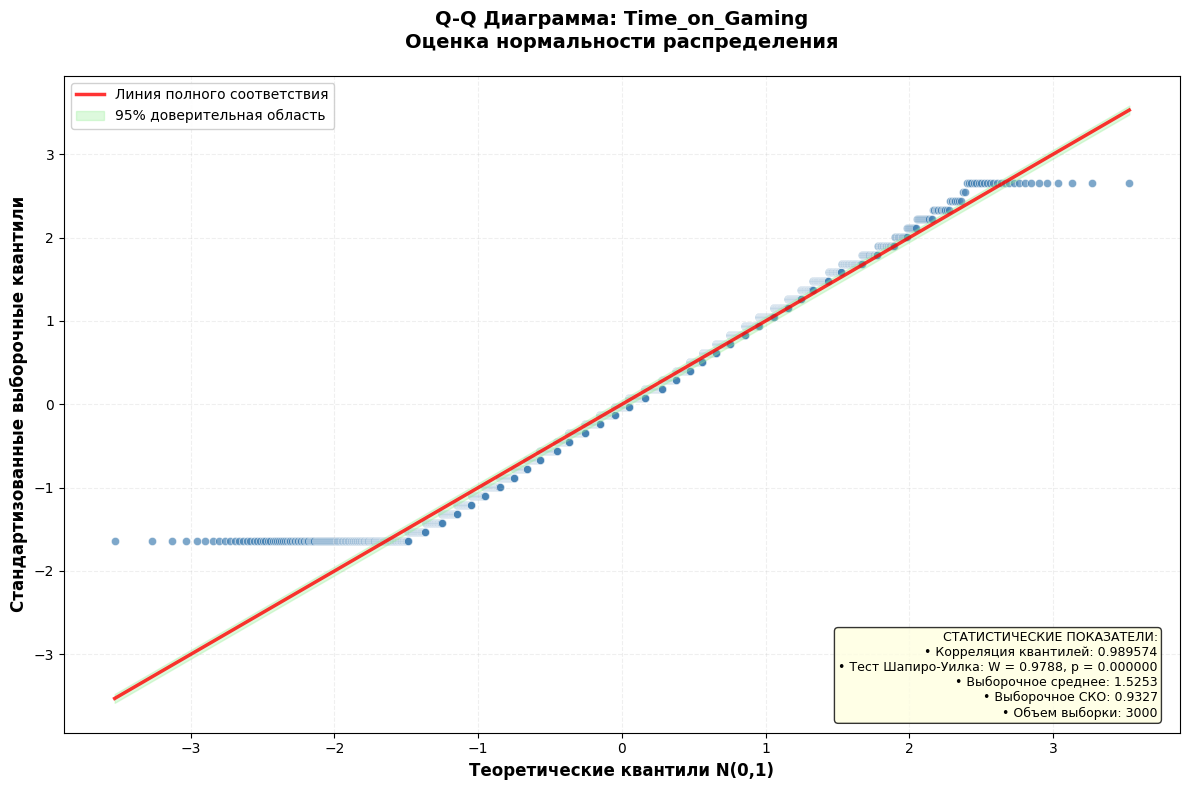


üìà –ö–û–†–†–ï–õ–Ø–¶–ò–Ø –ö–í–ê–ù–¢–ò–õ–ï–ô: 0.989574

üéØ –ò–ù–¢–ï–†–ü–†–ï–¢–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í:
‚úÖ –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É
   ‚Ä¢ –ù–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ —Å–∏—Å—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è
   ‚Ä¢ –ü—Ä–∏–≥–æ–¥–Ω–æ –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏—Ö —Ç–µ—Å—Ç–æ–≤

üìã –¢–ï–°–¢ –®–ê–ü–ò–†–û-–£–ò–õ–ö–ê: p = 0.000000
‚ùå –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å (p ‚â§ 0.05)


In [13]:
qq = visualize_quantile_comparison(df[col])

## –ê–Ω–∞–ª–∏–∑ —Ñ–æ—Ä–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

### –ê—Å–∏–º–º–µ—Ç—Ä–∏—è –∏ —ç–∫—Å—Ü–µ—Å—Å
- **–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏**: +0,259 (–Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—è—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è)
- **–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —ç–∫—Å—Ü–µ—Å—Å–∞**: -0,498 (–±–ª–∏–∑–æ–∫ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É, —Å–ª–µ–≥–∫–∞ –ø–ª–æ—Å–∫–æ–≤–µ—Ä—à–∏–Ω–Ω–æ–µ)

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

#### 1. –ö—Ä–∏—Ç–µ—Ä–∏–π —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç (œá¬≤)
- **–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ œá¬≤**: 453,230
- **–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã**: 9
- **–ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ**: 16,919
- **P-–∑–Ω–∞—á–µ–Ω–∏–µ**: < 0,001
- **–ó–∞–∫–ª—é—á–µ–Ω–∏–µ**: ‚ùå **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ù–ï —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É –∑–∞–∫–æ–Ω—É**

#### 2. –ê–Ω–∞–ª–∏–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏ –∏ —ç–∫—Å—Ü–µ—Å—Å–∞
- **Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏**: +5,795 (–∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: ¬±1,96)
- **Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —ç–∫—Å—Ü–µ—Å—Å–∞**: -5,575 (–∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: ¬±1,96)
- **P-–∑–Ω–∞—á–µ–Ω–∏—è**: < 0,001 –¥–ª—è –æ–±–µ–∏—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫
- **–ó–∞–∫–ª—é—á–µ–Ω–∏–µ**: ‚ùå **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ**

#### 3. Q-Q –∞–Ω–∞–ª–∏–∑
- **–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∫–≤–∞–Ω—Ç–∏–ª–µ–π**: 0,9896
- **–¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞**: p < 0,001
- **–ó–∞–∫–ª—é—á–µ–Ω–∏–µ**: ‚úÖ **–û—á–µ–Ω—å —Ö–æ—Ä–æ—à–µ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É** (–ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏), –Ω–æ ‚ùå **–æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è —Ç–µ—Å—Ç–æ–º –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞**

### –ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥ –ø–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏:
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ `Time_on_Gaming` **–ù–ï —è–≤–ª—è–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º**. –ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –≤—ã—Å–æ–∫—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –∫–≤–∞–Ω—Ç–∏–ª–µ–π (0,9896), –≤—Å–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ç–µ—Å—Ç—ã –æ—Ç–≤–µ—Ä–≥–∞—é—Ç –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –û—Å–Ω–æ–≤–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è:

1. **–ü—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—è—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è**: –±–æ–ª—å—à–µ –∑–Ω–∞—á–µ–Ω–∏–π —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–æ –≤ –ª–µ–≤–æ–π —á–∞—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
2. **–ü–ª–æ—Å–∫–æ–≤–µ—Ä—à–∏–Ω–Ω–æ—Å—Ç—å**: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–æ–ª–µ–µ –ø–ª–æ—Å–∫–æ–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º
3. **–ò–∑–±—ã—Ç–æ–∫ –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π**: –º–æ–¥–∞ —Ä–∞–≤–Ω–∞ 0, —á—Ç–æ –Ω–µ—Ç–∏–ø–∏—á–Ω–æ –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è


# Bring the data to a normal distribution

–£—Å–µ—á–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

        –°—Ä–µ–¥–Ω–µ–µ: 1.51
        –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.79
        –ú–æ–¥–∞: 0.00
        –ú–µ–¥–∏–∞–Ω–∞: 1.50
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: 0.80
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: 1.50
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: 2.20
        –≠–∫—Å—Ü–µ—Å—Å: -0.89
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: 0.06
        IQR: 1.40

    
–£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

        –°—Ä–µ–¥–Ω–µ–µ: 1.43
        –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.70
        –ú–æ–¥–∞: 0.00
        –ú–µ–¥–∏–∞–Ω–∞: 1.40
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: 0.80
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: 1.40
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: 2.10
        –≠–∫—Å—Ü–µ—Å—Å: -0.86
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: 0.01
        IQR: 1.30

    


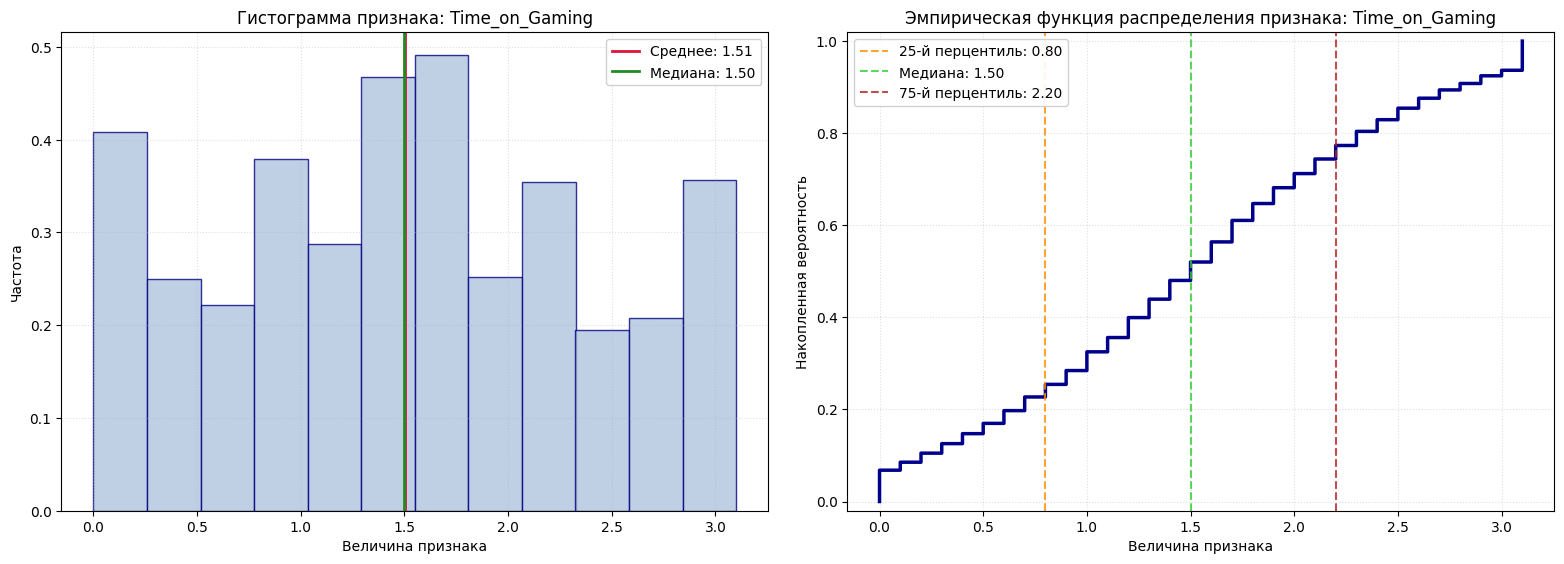

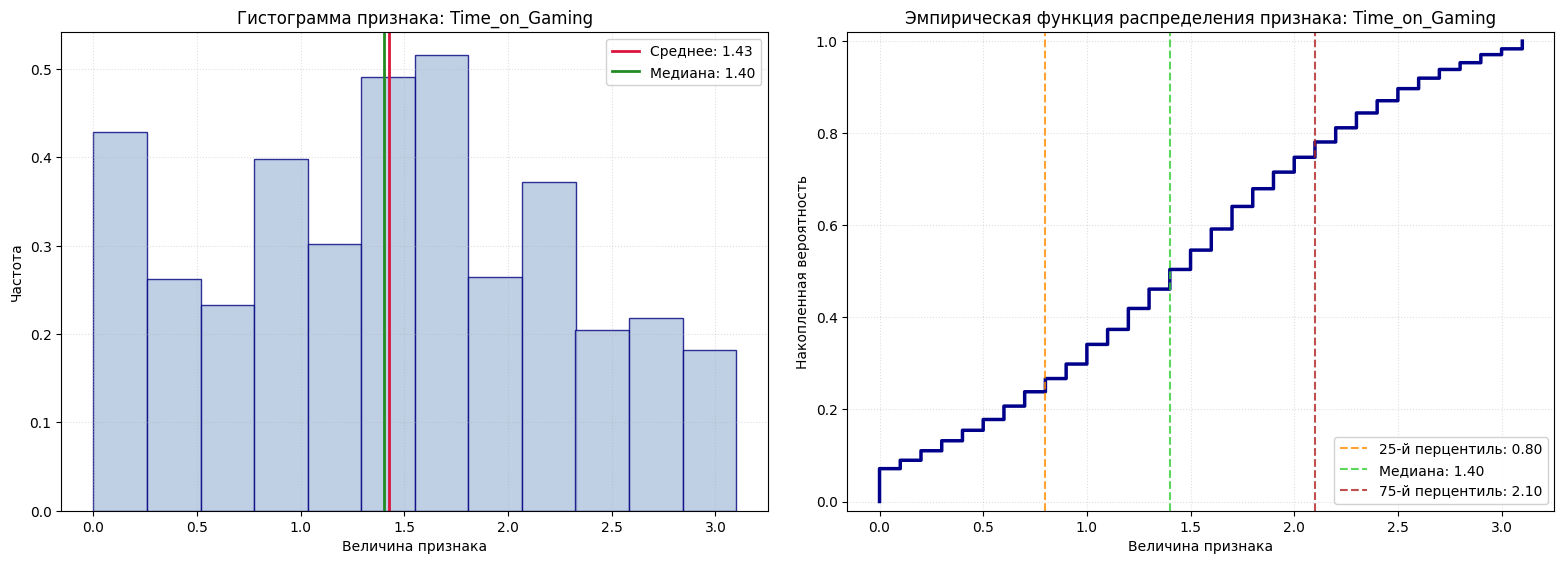

In [23]:
# outliers clip
col_outliers_clip = df[col]
lower_bound = col_outliers_clip.quantile(0.05)
upper_bound = col_outliers_clip.quantile(0.95)
col_outliers_clip = col_outliers_clip.clip(lower=lower_bound, upper=upper_bound)

print('–£—Å–µ—á–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤')
get_stats(col_outliers_clip)

# outliers remove
col_outliers_remove = df[col]
col_outliers_remove = col_outliers_remove[(col_outliers_remove >= lower_bound) & (col_outliers_remove <= upper_bound)]

print('–£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤')
get_stats(col_outliers_remove)

–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

        –°—Ä–µ–¥–Ω–µ–µ: 0.00
        –î–∏—Å–ø–µ—Ä—Å–∏—è: 1.00
        –ú–æ–¥–∞: -1.64
        –ú–µ–¥–∏–∞–Ω–∞: -0.03
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: -0.78
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: -0.03
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: 0.72
        –≠–∫—Å—Ü–µ—Å—Å: -0.50
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: 0.26
        IQR: 1.50

    
–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

        –°—Ä–µ–¥–Ω–µ–µ: 0.00
        –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.00
        –ú–æ–¥–∞: 0.00
        –ú–µ–¥–∏–∞–Ω–∞: 0.00
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: 0.00
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: 0.00
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: 0.00
        –≠–∫—Å—Ü–µ—Å—Å: -0.50
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: 0.26
        IQR: 0.00

    


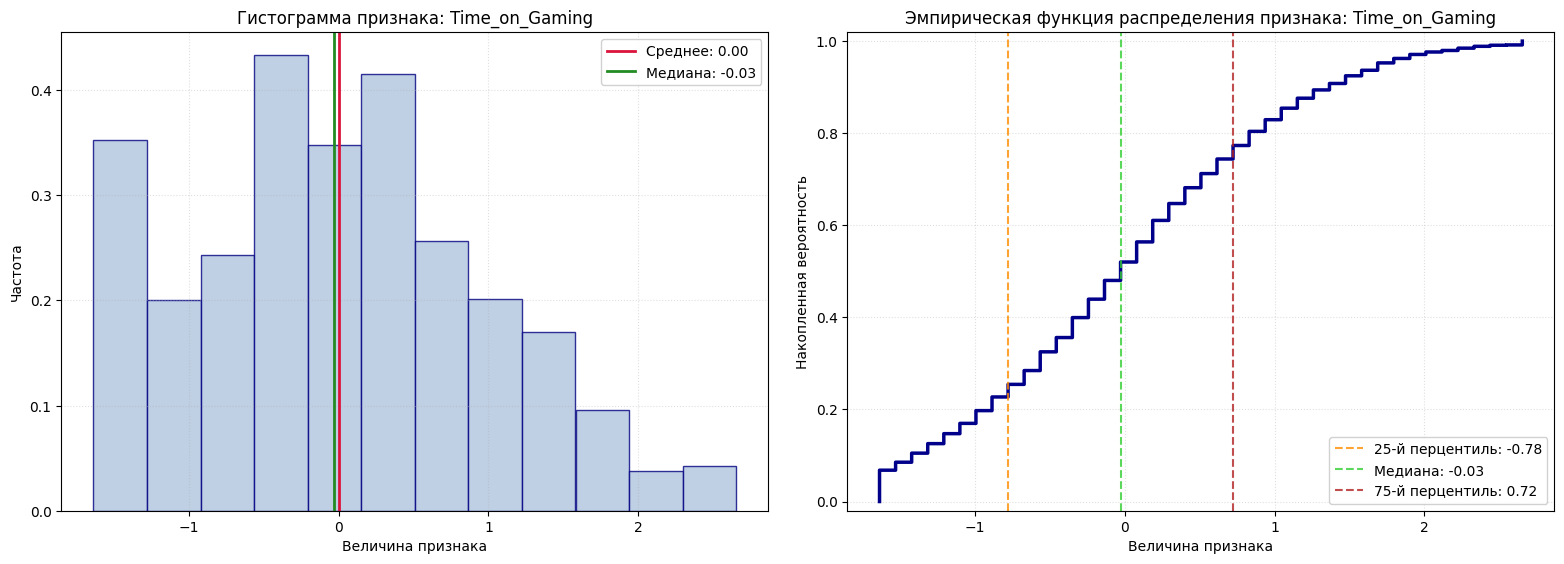

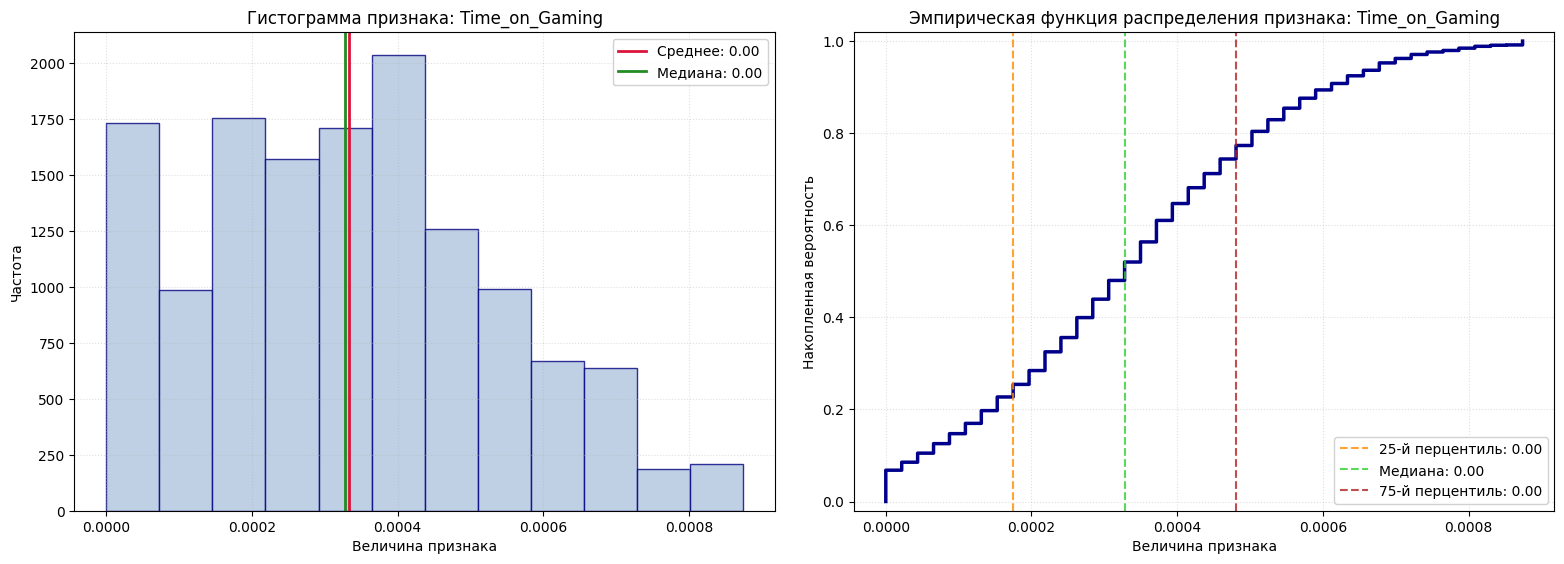

In [26]:
#standartisation
col_stand = (df[col] - df[col].mean()) / df[col].std()
print('–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è')
get_stats(col_stand)

# normalize
col_norm = df[col] / df[col].sum()
print('–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è')
get_stats(col_norm)

–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

        –°—Ä–µ–¥–Ω–µ–µ: 0.85
        –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.16
        –ú–æ–¥–∞: 0.00
        –ú–µ–¥–∏–∞–Ω–∞: 0.92
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: 0.59
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: 0.92
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: 1.16
        –≠–∫—Å—Ü–µ—Å—Å: -0.45
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: -0.53
        IQR: 0.58

    
–í–∑—è—Ç–∏–µ –∫–æ—Ä–Ω—è
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:

        –°—Ä–µ–¥–Ω–µ–µ: 1.14
        –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.22
        –ú–æ–¥–∞: 0.00
        –ú–µ–¥–∏–∞–Ω–∞: 1.22
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.25: 0.89
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.5: 1.22
        –ö–≤–∞–Ω—Ç–∏–ª—å 0.75: 1.48
        –≠–∫—Å—Ü–µ—Å—Å: 0.33
        –ê—Å—Å–∏–º–µ—Ç—Ä–∏—è: -0.83
        IQR: 0.59

    


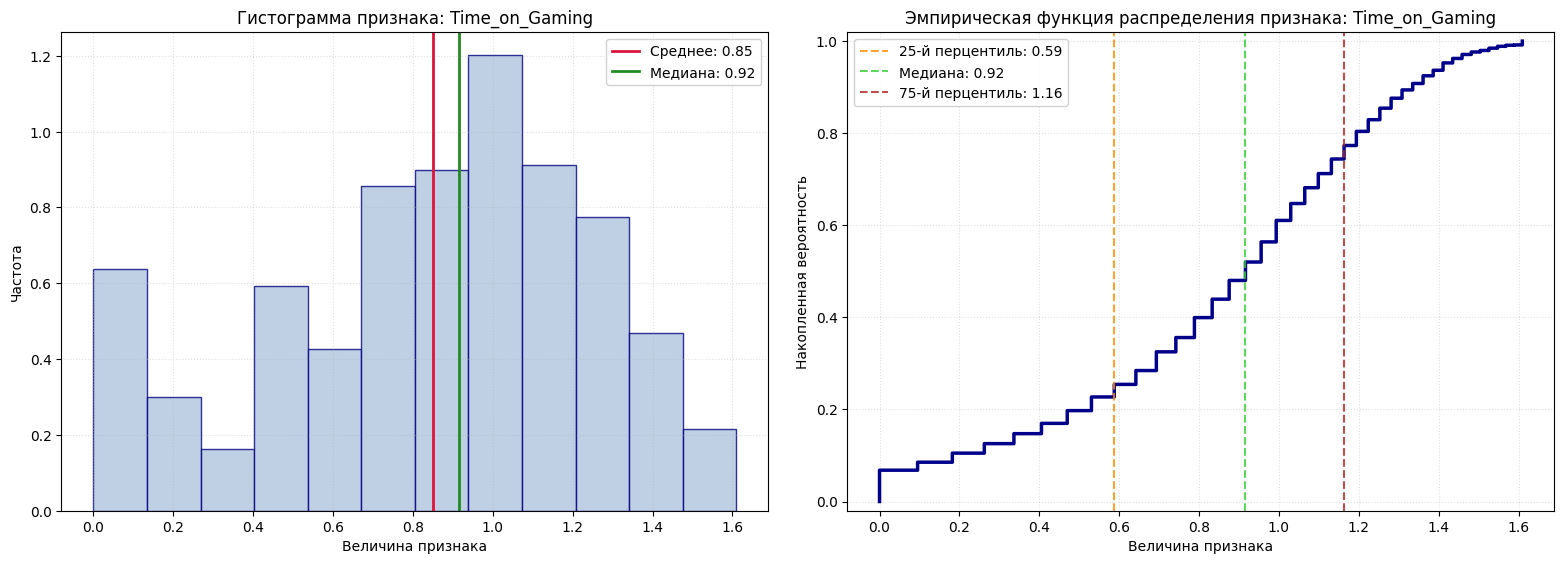

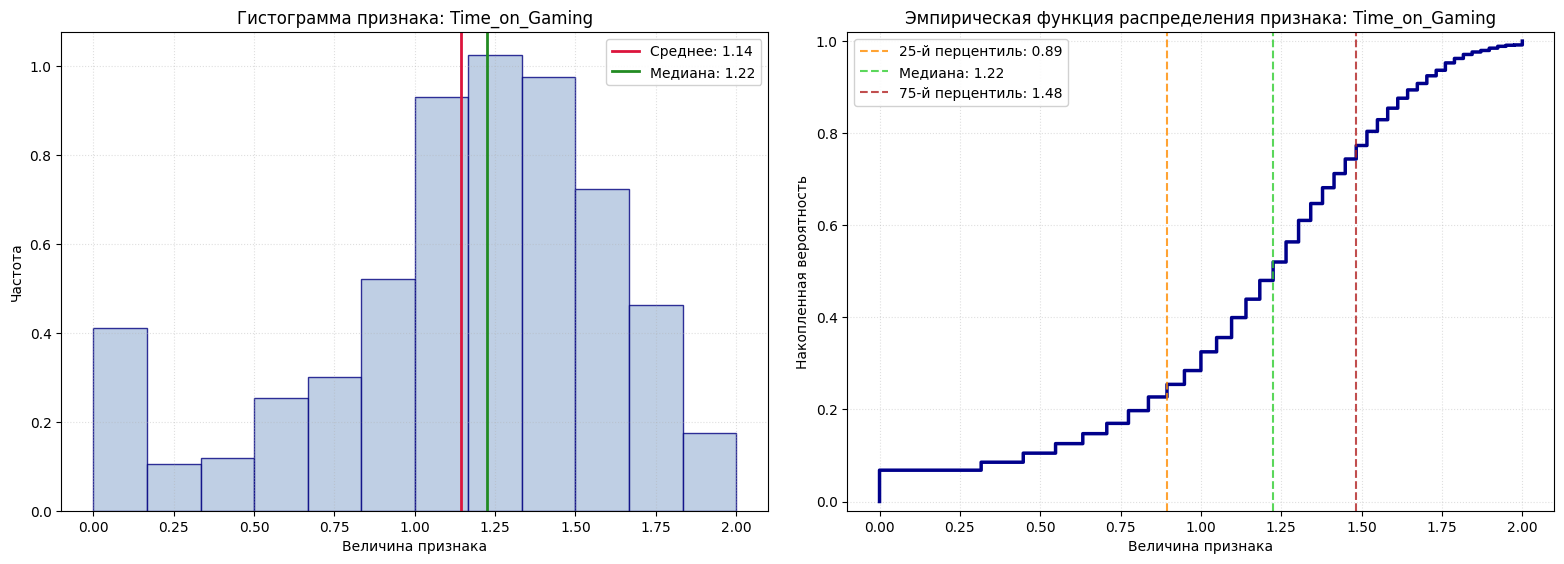

In [29]:
# –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ
col_log = np.log1p(df[col])
print('–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ')
get_stats(col_log)

# sqrt
col_sqrt = np.sqrt(df[col])
print('–í–∑—è—Ç–∏–µ –∫–æ—Ä–Ω—è')
get_stats(col_sqrt)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –¥–µ—Ç–µ—Ä–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –í–æ–∑–º–æ–∂–Ω–æ, –æ–Ω–æ —è–≤–ª—è–µ—Ç—Å—è –∫–æ–º–ø–æ–∑–∏—Ü–∏–µ–π –º–Ω–æ–≥–∏—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π, –Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–µ —á–∏—Å–ª–æ –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –ø–æ–∏—Å–∫ –ø–æ–¥—Ö–æ–¥—è—â–µ–π –Ω–µ–≤–æ–∑–º–æ–∂–Ω—ã–º.
–í –æ–±—â–µ–º –∏ —Ü–µ–ª–æ–º, –Ω–µ—Ç –≥–∞—Ä–∞–Ω—Ç–∏–π, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Ü–µ–ª–æ–º –º–æ–∂–Ω–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É.

## –ü–æ–ø—ã—Ç–∫–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö

### 1. –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤

#### –£—Å–µ—á–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ (5-95 –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª–∏):
- **–°—Ä–µ–¥–Ω–µ–µ**: 1,51 ‚Üí –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ
- **–ê—Å–∏–º–º–µ—Ç—Ä–∏—è**: 0,26 ‚Üí 0,06 (—É–ª—É—á—à–µ–Ω–∏–µ!)
- **–≠–∫—Å—Ü–µ—Å—Å**: -0,50 ‚Üí -0,89 (—É—Ö—É–¥—à–µ–Ω–∏–µ)
- **–í—ã–≤–æ–¥**: –£—Å–µ—á–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –∑–∞–º–µ—Ç–Ω–æ —É–ª—É—á—à–∏–ª–æ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å

#### –£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤:
- **–°—Ä–µ–¥–Ω–µ–µ**: 1,43 (—Å–Ω–∏–∂–µ–Ω–∏–µ)
- **–ê—Å–∏–º–º–µ—Ç—Ä–∏—è**: 0,26 ‚Üí 0,01 (–ø–æ—á—Ç–∏ –∏–¥–µ–∞–ª—å–Ω–∞—è —Å–∏–º–º–µ—Ç—Ä–∏—è!)
- **–≠–∫—Å—Ü–µ—Å—Å**: -0,50 ‚Üí -0,86 (—É—Ö—É–¥—à–µ–Ω–∏–µ –ø–ª–æ—Å–∫–æ–≤–µ—Ä—à–∏–Ω–Ω–æ—Å—Ç–∏)
- **–í—ã–≤–æ–¥**: –£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —É—Å—Ç—Ä–∞–Ω–∏–ª–æ –∞—Å–∏–º–º–µ—Ç—Ä–∏—é

### 2. –ú–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

#### –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è:
- **–°—Ä–µ–¥–Ω–µ–µ**: 0,00 (–ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é)
- **–î–∏—Å–ø–µ—Ä—Å–∏—è**: 1,00 (–ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é)
- **–ê—Å–∏–º–º–µ—Ç—Ä–∏—è**: 0,26 (–±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π)
- **–≠–∫—Å—Ü–µ—Å—Å**: -0,50 (–±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π)
- **–í—ã–≤–æ–¥**: –§–æ—Ä–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –∏–∑–º–µ–Ω–∏–ª–∞—Å—å

#### –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è (–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Å—É–º–º—É):
- –í—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è –±–ª–∏–∑–∫–∏ –∫ –Ω—É–ª—é
- **–í—ã–≤–æ–¥**: –ù–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö

#### –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ (log1p):
- **–°—Ä–µ–¥–Ω–µ–µ**: 0,85
- **–ê—Å–∏–º–º–µ—Ç—Ä–∏—è**: +0,26 ‚Üí -0,53 (–∏–∑–º–µ–Ω–µ–Ω–∏–µ –∑–Ω–∞–∫–∞!)
- **–≠–∫—Å—Ü–µ—Å—Å**: -0,50 ‚Üí -0,45 (–Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ)
- **–í—ã–≤–æ–¥**: –õ–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–∑–º–µ–Ω–∏–ª–æ –ø—Ä–∞–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—é—é –∞—Å–∏–º–º–µ—Ç—Ä–∏—é –Ω–∞ –ª–µ–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—é—é

#### –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –∫–æ—Ä–Ω—è:
- **–°—Ä–µ–¥–Ω–µ–µ**: 1,14
- **–ê—Å–∏–º–º–µ—Ç—Ä–∏—è**: +0,26 ‚Üí -0,83 (—Å–∏–ª—å–Ω–∞—è –ª–µ–≤–æ—Å—Ç–æ—Ä–æ–Ω–Ω—è—è –∞—Å–∏–º–º–µ—Ç—Ä–∏—è)
- **–≠–∫—Å—Ü–µ—Å—Å**: -0,50 ‚Üí 0,33 (–ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É)
- **–í—ã–≤–æ–¥**: –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Å–ª–∏—à–∫–æ–º —Ä–∞–¥–∏–∫–∞–ª—å–Ω–æ –∏–∑–º–µ–Ω–∏–ª–æ —Ñ–æ—Ä–º—É

### –ó–∞–∫–ª—é—á–µ–Ω–∏–µ –ø–æ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏:
**–ù–∏ –æ–¥–Ω–æ –∏–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –Ω–µ –ø—Ä–∏–≤–µ–ª–æ –¥–∞–Ω–Ω—ã–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.** –õ—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–∫–∞–∑–∞–ª–æ **—É–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤**, –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —É—Å—Ç—Ä–∞–Ω–∏–ª–æ –∞—Å–∏–º–º–µ—Ç—Ä–∏—é (0,01), –Ω–æ —É—Å–∏–ª–∏–ª–æ –ø–ª–æ—Å–∫–æ–≤–µ—Ä—à–∏–Ω–Ω–æ—Å—Ç—å. –≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≤—ã–≤–æ–¥ –æ —Ç–æ–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç —Å–ª–æ–∂–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É, –Ω–µ —Å–≤–æ–¥–∏–º—É—é –∫ –ø—Ä–æ—Å—Ç—ã–º —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.


# Group by School_Grade

In [36]:
def analyze_groups_by_grade(df, value_column, grade_column='School_Grade'):
    
    # –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    grouped = df.groupby(grade_column)[value_column]
    
    # –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
    plt.figure(figsize=(12, 8))
    
    # –ü–æ–ª—É—á–∞–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–ª–∞—Å—Å—ã –∏ —Ü–≤–µ—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ
    grades = sorted(df[grade_column].unique())
    colors = plt.cm.Set3(np.linspace(0, 1, len(grades)))
    
    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º –¥–ª—è –∫–∞–∂–¥–æ–π –≥—Ä—É–ø–ø—ã
    for i, (grade, color) in enumerate(zip(grades, colors)):
        group_data = grouped.get_group(grade).dropna()
        
        # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
        plt.hist(group_data, alpha=0.7, color=color, label=f'{grade} –∫–ª–∞—Å—Å', 
                bins=15, density=True, edgecolor='black', linewidth=0.5)
    
    plt.xlabel(value_column, fontsize=12, fontweight='bold')
    plt.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏', fontsize=12, fontweight='bold')
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {value_column} –ø–æ –∫–ª–∞—Å—Å–∞–º —à–∫–æ–ª—ã', 
             fontsize=14, fontweight='bold', pad=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # –†–∞—Å—á–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
    stats_results = {}
    
    print("üìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ü–û –ö–õ–ê–°–°–ê–ú:")
    print("=" * 50)
    
    for grade in grades:
        group_data = grouped.get_group(grade).dropna()
        
        mean_val = group_data.mean()
        variance_val = group_data.var()
        std_val = group_data.std()
        count_val = len(group_data)
        
        stats_results[grade] = {
            'mean': mean_val,
            'variance': variance_val,
            'std': std_val,
            'count': count_val
        }
        
        print(f"üéì {grade} –∫–ª–∞—Å—Å:")
        print(f"   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–µ–Ω–∏–∫–æ–≤: {count_val}")
        print(f"   ‚Ä¢ –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {mean_val:.2f}")
        print(f"   ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å–∏—è: {variance_val:.2f}")
        print(f"   ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: {std_val:.2f}")
        print(f"   ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: {(std_val/mean_val*100):.1f}%")
        print("-" * 30)
    



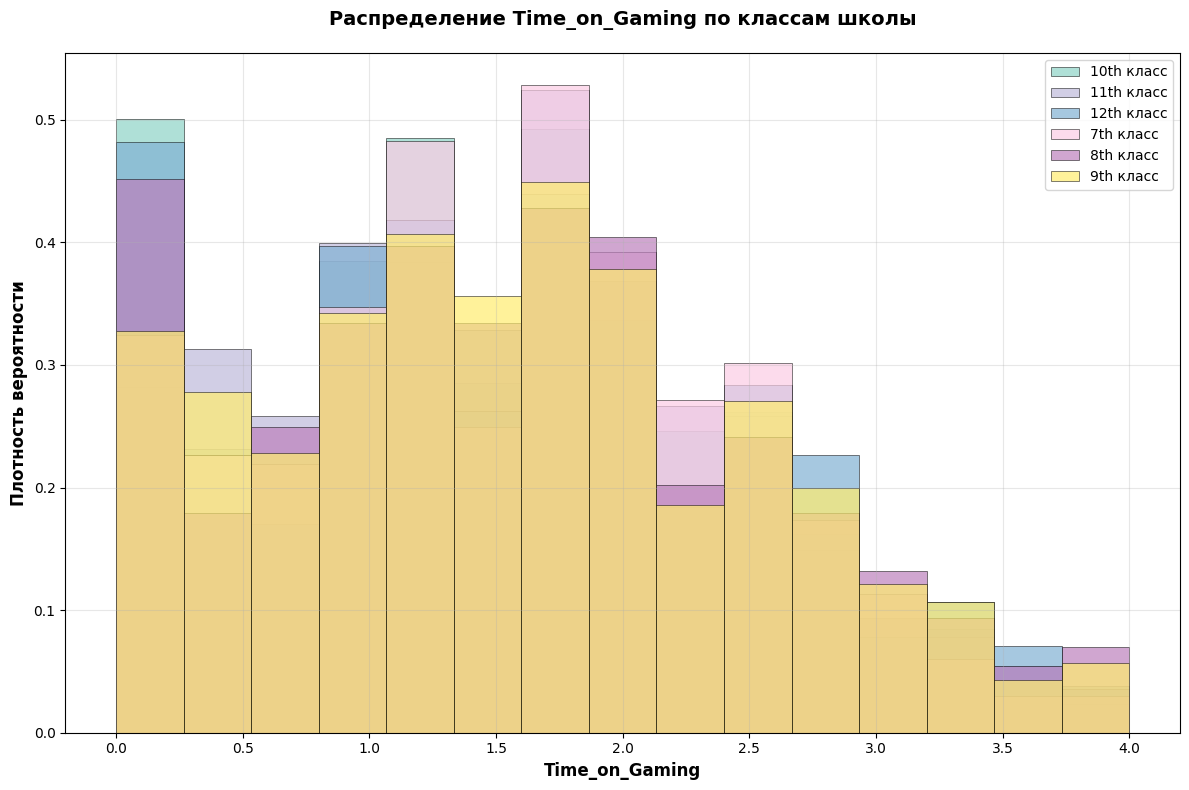

üìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ü–û –ö–õ–ê–°–°–ê–ú:
üéì 10th –∫–ª–∞—Å—Å:
   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–µ–Ω–∏–∫–æ–≤: 487
   ‚Ä¢ –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 1.45
   ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.86
   ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.93
   ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: 63.9%
------------------------------
üéì 11th –∫–ª–∞—Å—Å:
   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–µ–Ω–∏–∫–æ–≤: 479
   ‚Ä¢ –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 1.51
   ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.79
   ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.89
   ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: 58.7%
------------------------------
üéì 12th –∫–ª–∞—Å—Å:
   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–µ–Ω–∏–∫–æ–≤: 529
   ‚Ä¢ –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 1.52
   ‚Ä¢ –î–∏—Å–ø–µ—Ä—Å–∏—è: 0.94
   ‚Ä¢ –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 0.97
   ‚Ä¢ –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏: 63.9%
------------------------------
üéì 7th –∫–ª–∞—Å—Å:
   ‚Ä¢ –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—á–µ–Ω–∏–∫–æ–≤: 497
   ‚Ä¢ –°

In [37]:
analyze_groups_by_grade(df, col)

## –ê–Ω–∞–ª–∏–∑ –ø–æ –∫–ª–∞—Å—Å–∞–º —à–∫–æ–ª—ã

### –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∏–≥—Ä –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º:

| –ö–ª–∞—Å—Å | –ö–æ–ª-–≤–æ —É—á–µ–Ω–∏–∫–æ–≤ | –°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è (—á) | –°—Ç. –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ | –ö–æ—ç—Ñ. –≤–∞—Ä–∏–∞—Ü–∏–∏ |
|-------|-----------------|-------------------|----------------|----------------|
| 7-–π   | 497             | 1,55              | 0,88           | 56,7%          |
| 8-–π   | 482             | 1,54              | 0,98           | 63,8%          |
| 9-–π   | 526             | 1,57              | 0,94           | 59,8%          |
| 10-–π  | 487             | 1,45              | 0,93           | 63,9%          |
| 11-–π  | 479             | 1,51              | 0,89           | 58,7%          |
| 12-–π  | 529             | 1,52              | 0,97           | 63,9%          |

### –ö–ª—é—á–µ–≤—ã–µ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏:

#### 1. –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –¥–∏–Ω–∞–º–∏–∫–∞ –∏–≥—Ä–æ–≤–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏:
- **–ú–ª–∞–¥—à–∏–µ –∫–ª–∞—Å—Å—ã (7-9)**: –°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è ~1,55 —á–∞—Å–∞ (–ø–∏–∫ –≤ 9-–º –∫–ª–∞—Å—Å–µ)
- **–°—Ç–∞—Ä—à–∏–µ –∫–ª–∞—Å—Å—ã (10-12)**: –°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è ~1,49 —á–∞—Å–∞ (—Å–Ω–∏–∂–µ–Ω–∏–µ)
- **–¢–µ–Ω–¥–µ–Ω—Ü–∏—è**: –ù–µ–±–æ–ª—å—à–æ–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –∏–≥—Ä–æ–≤–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ —Å—Ç–∞—Ä—à–∏—Ö –∫–ª–∞—Å—Å–∞—Ö

#### 2. –ò–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç—å –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–º:
- **–ù–∞–∏–º–µ–Ω—å—à–∞—è –≤–∞—Ä–∏–∞—Ü–∏—è**: 7-–π –∫–ª–∞—Å—Å (56,7%) - –±–æ–ª–µ–µ –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ
- **–ù–∞–∏–±–æ–ª—å—à–∞—è –≤–∞—Ä–∏–∞—Ü–∏—è**: 8-–π, 10-–π, 12-–π –∫–ª–∞—Å—Å—ã (~64%) - –±–æ–ª—å—à–∏–π —Ä–∞–∑–±—Ä–æ—Å
- **–°—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å**: 11-–π –∫–ª–∞—Å—Å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å (58,7%)

#### 3. –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è:
- **–ú–∞–∫—Å–∏–º—É–º**: 9-–π –∫–ª–∞—Å—Å (1,57 —á) - –ø–µ—Ä–∏–æ–¥ –Ω–∞–∏–±–æ–ª—å—à–µ–≥–æ —É–≤–ª–µ—á–µ–Ω–∏—è –∏–≥—Ä–∞–º–∏
- **–ú–∏–Ω–∏–º—É–º**: 10-–π –∫–ª–∞—Å—Å (1,45 —á) - –≤–æ–∑–º–æ–∂–Ω–æ, —Å–≤—è–∑–∞–Ω–æ —Å –ø–æ–¥–≥–æ—Ç–æ–≤–∫–æ–π –∫ —ç–∫–∑–∞–º–µ–Ω–∞–º
- **–†–∞–∑–±—Ä–æ—Å –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏**: 0,12 —á–∞—Å–∞ (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–±–æ–ª—å—à–æ–π)

### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:

1. **–ü–æ–¥—Ä–æ—Å—Ç–∫–æ–≤—ã–π –ø–∏–∫**: –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –≤—Ä–µ–º—è –∏–≥—Ä –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ 9-–π –∫–ª–∞—Å—Å, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –≤–æ–∑—Ä–∞—Å—Ç—É 14-15 –ª–µ—Ç - –ø–µ—Ä–∏–æ–¥—É –Ω–∞–∏–±–æ–ª—å—à–µ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤ –∏–≥—Ä–∞—Ö.

2. **–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–æ–µ –¥–∞–≤–ª–µ–Ω–∏–µ**: –°–Ω–∏–∂–µ–Ω–∏–µ –≤ 10-–º –∫–ª–∞—Å—Å–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –ø–µ—Ä–µ—Ö–æ–¥–æ–º –≤ —Å—Ç–∞—Ä—à—É—é —à–∫–æ–ª—É –∏ –ø–æ–≤—ã—à–µ–Ω–Ω–æ–π —É—á–µ–±–Ω–æ–π –Ω–∞–≥—Ä—É–∑–∫–æ–π.

3. **–û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å**: –†–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ –Ω–µ–≤–µ–ª–∏–∫–∏ (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∞—Ä–∏–∞—Ü–∏–∏ –º–µ–∂–¥—É –∫–ª–∞—Å—Å–∞–º–∏ < 4%), —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∏–≥—Ä–æ–≤—ã–µ –ø—Ä–∏–≤—ã—á–∫–∏ —Ñ–æ—Ä–º–∏—Ä—É—é—Ç—Å—è —Ä–∞–Ω–æ –∏ –æ—Å—Ç–∞—é—Ç—Å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω—ã–º–∏.
